In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5) # 이 두줄은 본 필자가 항상 쓰는 방법입니다. matplotlib 의 기본 scheme 말고 seaborn scheme 을 세팅하고, 일일이 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용하면 편합니다.
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 변수(feature, variable)	정의	설명	타입

- survival,생존여부	target label 임. 1, 0 으로 표현됨	integer
- Pclass	티켓의 클래스	1 = 1st, 2 = 2nd, 3 = 3rd 클래스로 나뉘며 categorical feature	integer
- sex	성별	male, female 로 구분되며 binary	string
- Age	나이	continuous	integer
- sibSp	함께 탑승한 형제와 배우자의 수	quantitative	integer
- parch	함께 탑승한 부모, 아이의 수	quantitative	integer
- ticket	티켓 번호	alphabat + integer	string
- fare	탑승료	continuous	float
- cabin	객실 번호	alphabat + integer	string
- embared	탑승 항구	C = Cherbourg, Q = Queenstown, S = Southampton	string

# 1. 판다스로 데이터 확인하기

## 데이터 읽기 :  첫번재 칼럼을 인덱스로 처리

In [13]:
titanic = pd.read_csv("./data/train.csv", index_col=0)

## 내부 데이터 구조 알아보기

In [14]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 칼럼에 대한 자료형 확인하기

In [15]:
titanic.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

## 데이터 칼럼과 내부 값이 다 들어왔는지 확인

In [16]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


## 숫자 열에 대한 기술 통계 확인

In [17]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
for col in titanic.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (tatinic[col].isnull().sum() / tatinic[col].shape[0]))
    print(msg)

column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [20]:
tatinic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [21]:
tatinic.isnull().sum()/ tatinic.shape[0]

Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

## MANO 라는 라이브러리를 사용하면 null data의 존재를 더 쉽게 볼 수 있습니다.

## 매트릭스 그래프로 확인하기

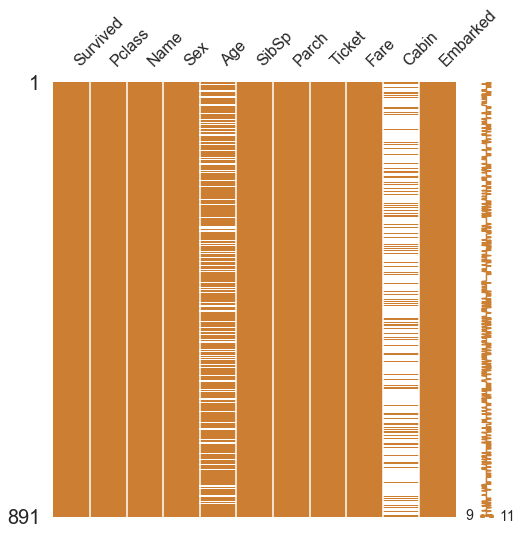

In [23]:
msno.matrix(df=titanic.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

### 막대그래프로 확인하기

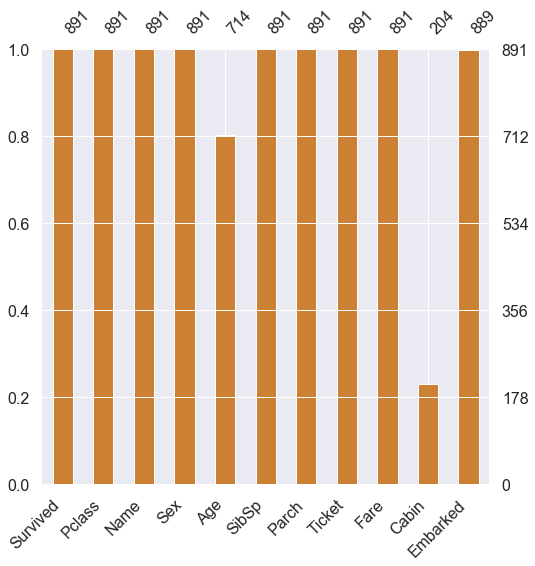

In [24]:
msno.bar(df=titanic.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

# 2. Target label 확인

    target label 이 어떤 distribution 을 가지고 있는 지 확인해봐야 합니다.
    지금 같은 binary classification 문제의 경우에서, 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라 질 수 있습니다.

## 2-1 데이터 프레임을 이용해서 맷플랏립  그래프 그리기

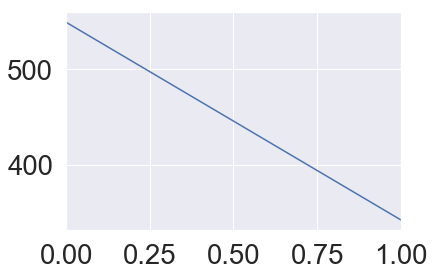

In [42]:
titanic['Survived'].value_counts().plot()

### 원그래프 그리기

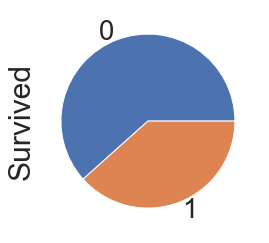

In [43]:
titanic['Survived'].value_counts().plot(kind='pie')

### 그래프의 간격을 주기

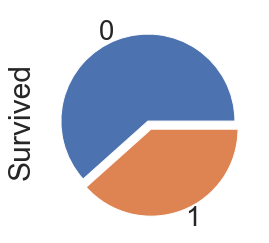

In [44]:
titanic['Survived'].value_counts().plot.pie(explode=[0, 0.1])

### 그래프 내에 값 넣기

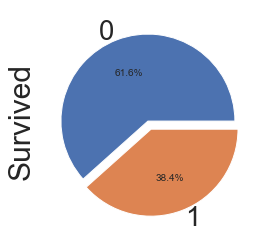

In [45]:
titanic['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%')

### 그래프에 그림자 넣기

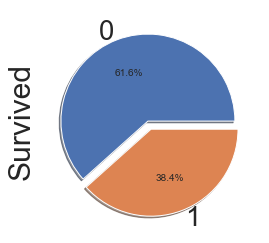

In [46]:
titanic['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', shadow=True)

### 두 개의 그래프에서 첫번째에 원그래프 넣기

Text(0, 0.5, '')

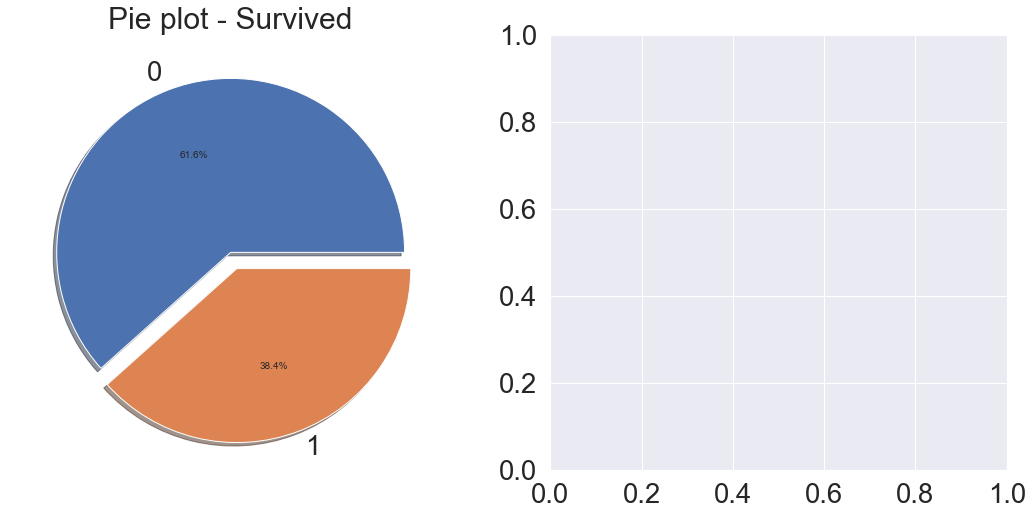

In [48]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

titanic['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

## 2-2 시본으로 카운트 플랏 그리기

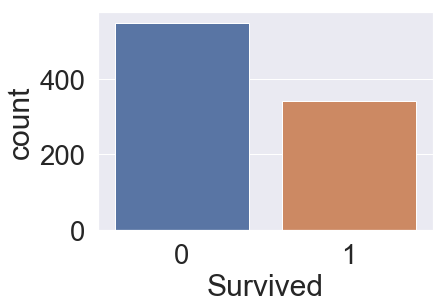

In [49]:
sns.countplot('Survived', data=titanic)

## 2-3 두개의 그래프를 하나로 통합하기

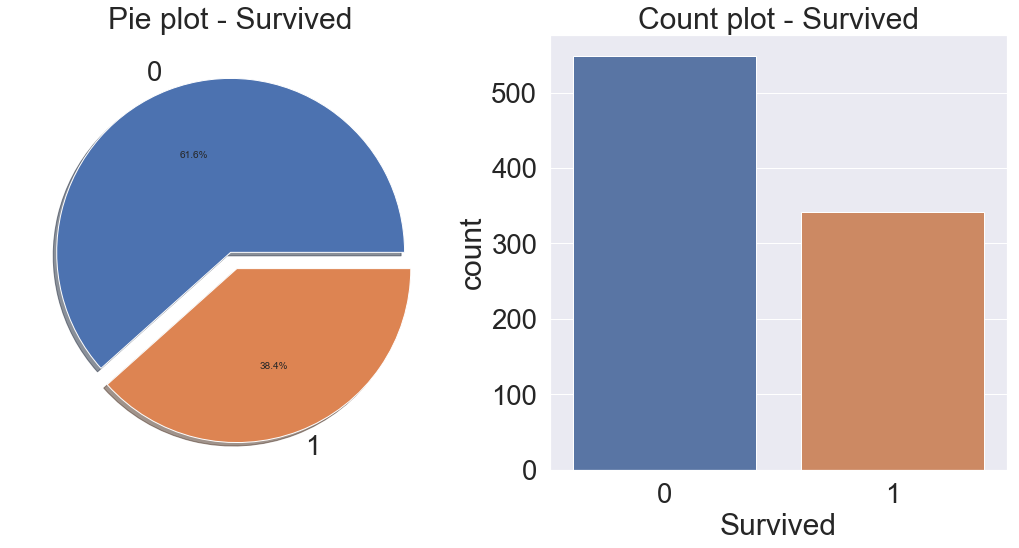

In [27]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

titanic['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=titanic, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

# 3.  Exploratory data analysis

## 3-1 Pclass

    먼저 Pclass 에 대해서 살펴보겠습니다. Pclass 는 ordinal, 서수형 데이터입니다. 카테고리이면서, 순서가 있는 데이터 타입입니다.
    먼저 Pclass 에 따른 생존률의 차이를 살펴보겠습니다. 엑셀의 피벗 차트와 유사한 작업을 하게 되는데, pandas dataframe 에서는 groupby 를 사용하면 쉽게 할 수 있습니다. 또한 pivot 이라는 메소드도 있습니다.
    'Pclass', 'Survived' 를 가져온 후, pclass 로 묶습니다. 그러고 나면 각 pclass 마다 0, 1 이 count가 되는데, 이를 평균내면 각 pclass 별 생존률이 나옵니다
    아래와 같이 count() 를 하면, 각 class 에 몇명이 있는 지 확인할 수 있으며, sum() 을 하면, 216 명중 생존한(survived=1)사람의 총합을 주게 됩니다

### 그룹으로 처리하기

In [29]:
titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True)

### 그룹 내의 개수 처리하기

In [28]:
titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [31]:
titanic.shape

(891, 11)

###  실제 생존자의 합

In [30]:
titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


### pandas 의 crosstab 을 사용하면 좀 더 위 과정을 좀 더 수월하게 볼 수 있습니다

In [34]:
help(pd.crosstab)

Help on function crosstab in module pandas.core.reshape.pivot:

crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)
    Compute a simple cross-tabulation of two (or more) factors. By default
    computes a frequency table of the factors unless an array of values and an
    aggregation function are passed
    
    Parameters
    ----------
    index : array-like, Series, or list of arrays/Series
        Values to group by in the rows
    columns : array-like, Series, or list of arrays/Series
        Values to group by in the columns
    values : array-like, optional
        Array of values to aggregate according to the factors.
        Requires `aggfunc` be specified.
    rownames : sequence, default None
        If passed, must match number of row arrays passed
    colnames : sequence, default None
        If passed, must match number of column arrays passed
    aggfunc : function, optional
 

In [35]:
pd.crosstab(titanic['Pclass'], titanic['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


### 마진을 주면 합산 처리

In [36]:
pd.crosstab(titanic['Pclass'], titanic['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


## 내부 스타일을 처리하기

In [40]:
help(pd.DataFrame().style.background_gradient)

Help on method background_gradient in module pandas.io.formats.style:

background_gradient(cmap='PuBu', low=0, high=0, axis=0, subset=None, text_color_threshold=0.408) method of pandas.io.formats.style.Styler instance
    Color the background in a gradient according to
    the data in each column (optionally row).
    
    Requires matplotlib.
    
    Parameters
    ----------
    cmap : str or colormap
        matplotlib colormap
    low, high : float
        compress the range by these values.
    axis : int or str
        1 or 'columns' for columnwise, 0 or 'index' for rowwise
    subset : IndexSlice
        a valid slice for ``data`` to limit the style application to
    text_color_threshold : float or int
        luminance threshold for determining text color. Facilitates text
        visibility across varying background colors. From 0 to 1.
        0 = all text is dark colored, 1 = all text is light colored.
    
        .. versionadded:: 0.24.0
    
    Returns
    -------
    

### 세부 스타일 적용하기

In [33]:
pd.crosstab(titanic['Pclass'], titanic['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


### 평균값 구하기

In [52]:
titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [51]:
titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


### 평균값에 대한 막대그래프 그리기

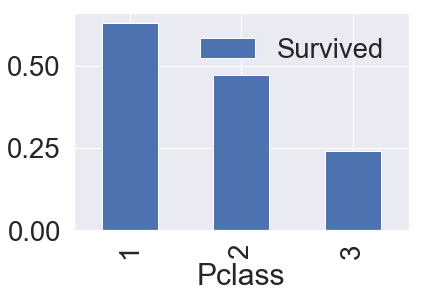

In [50]:
titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

## 등급에 따른 사람수, 생존자와 사망자 그래프 그리기

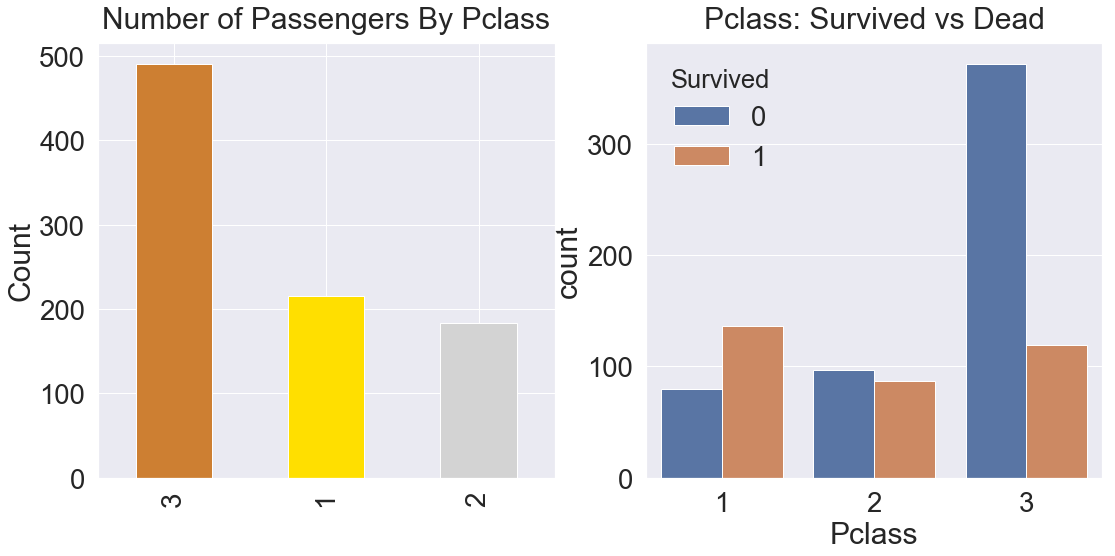

In [54]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
titanic['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=titanic, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

## 3-2 성별 기준으로 확인하기

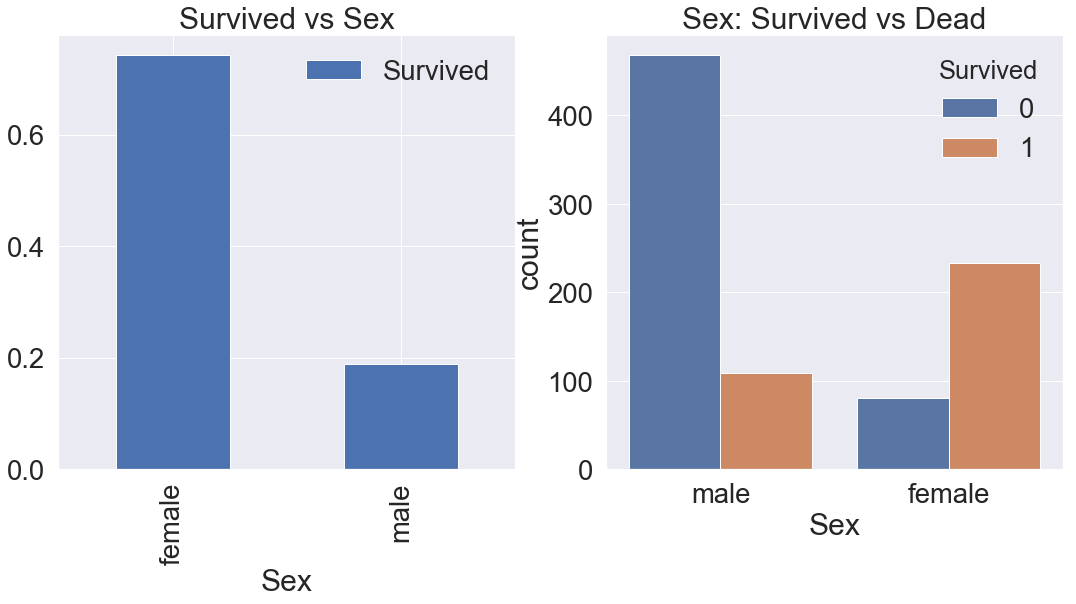

In [57]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
titanic[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=titanic, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

### 성별로 사망자의 평균을 확인하기

In [58]:
titanic[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


### 그로스탭으로 생존자 희생자를 분리해서 보기

In [59]:
pd.crosstab(titanic['Sex'], titanic['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


### 성별 생존자에 대한 그래프 확인하기

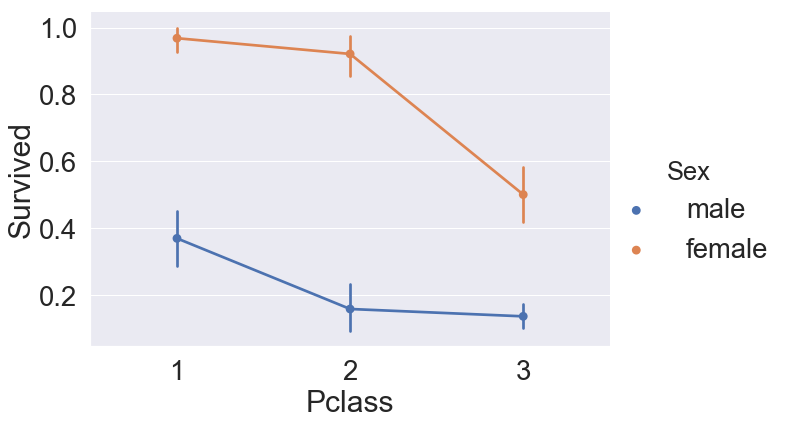

In [60]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=titanic,size=6, aspect=1.5)

### 성별로 각 등급별 생존자에 대한 정보 확인

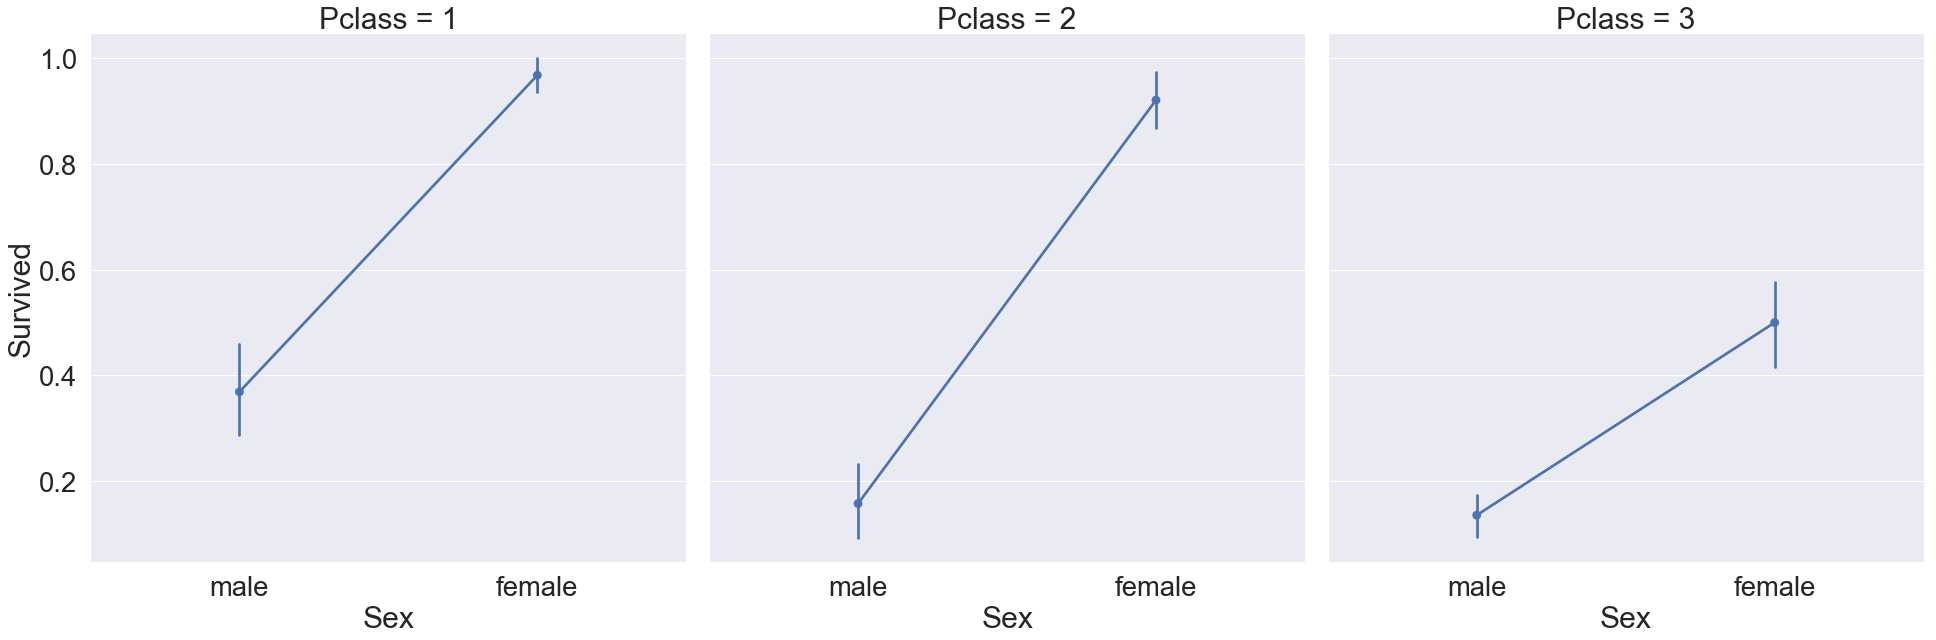

In [61]:
sns.factorplot(x='Sex', y='Survived', col='Pclass',data=titanic, satureation=.5, size=9, aspect=1)

## 3-3  나이별로 확인하기

In [62]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(titanic['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(titanic['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(titanic['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


### kde 그래프 그리기

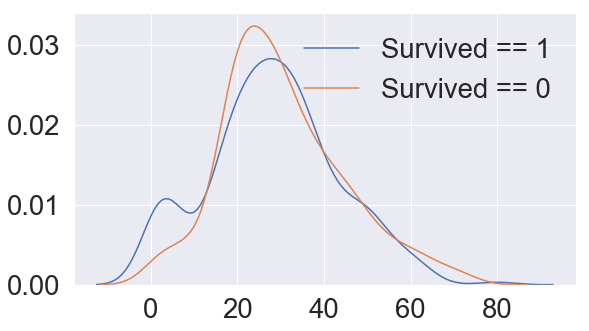

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(titanic[titanic['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(titanic[titanic['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

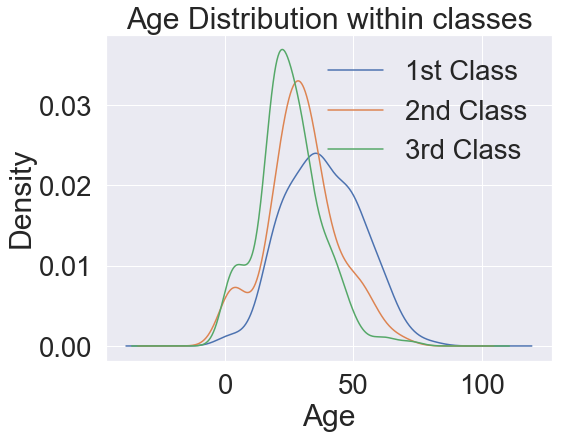

In [66]:
# Age distribution withing classes
plt.figure(figsize=(8, 6))
titanic['Age'][titanic['Pclass'] == 1].plot(kind='kde')
titanic['Age'][titanic['Pclass'] == 2].plot(kind='kde')
titanic['Age'][titanic['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

### 각 나이별로 생존자 비율 확인하기

In [69]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(titanic[titanic['Age'] < i]['Survived'].sum() / len(titanic[titanic['Age'] < i]['Survived']))
    

In [70]:
cummulate_survival_ratio 

[1.0,
 0.8571428571428571,
 0.625,
 0.6666666666666666,
 0.675,
 0.7045454545454546,
 0.7021276595744681,
 0.68,
 0.6666666666666666,
 0.6129032258064516,
 0.59375,
 0.5735294117647058,
 0.5797101449275363,
 0.5915492957746479,
 0.5769230769230769,
 0.5903614457831325,
 0.55,
 0.5398230088495575,
 0.5035971223021583,
 0.4817073170731707,
 0.45555555555555555,
 0.4264705882352941,
 0.42424242424242425,
 0.41700404858299595,
 0.4244604316546763,
 0.4119601328903654,
 0.40752351097178685,
 0.41839762611275966,
 0.4065934065934066,
 0.40625,
 0.40389294403892945,
 0.40654205607476634,
 0.4107142857142857,
 0.4103671706263499,
 0.4091858037578288,
 0.4164989939637827,
 0.41923076923076924,
 0.41634980988593157,
 0.4171322160148976,
 0.41560798548094374,
 0.41519434628975266,
 0.4143356643356643,
 0.4153846153846154,
 0.4135593220338983,
 0.41235392320534225,
 0.4110929853181077,
 0.4090909090909091,
 0.4048,
 0.4085173501577287,
 0.4109375,
 0.4123076923076923,
 0.410958904109589,
 0.411764

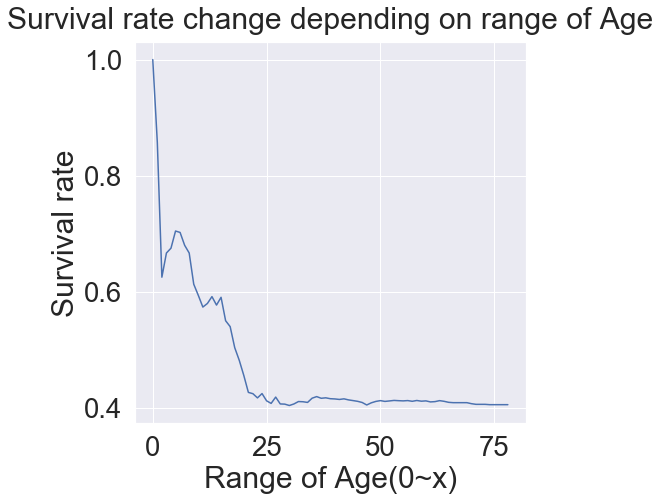

In [71]:
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()